In [1]:
#importing required libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
#importing dataset
df=pd.read_csv('Divali_sales_data.csv',encoding= 'unicode_escape')

In [3]:
df.head()

,User_ID,Cust_name,Product_ID,Gender,Age Group,Age,Marital_Status,State,Zone,Occupation,Product_Category,Orders,Amount,Status,unnamed1
0,1002903,Sanskriti,P00125942,F,26-35,28,0,Maharashtra,Western,Healthcare,Auto,1,23952.0,NaN,NaN
1,1000732,Kartik,P00110942,F,26-35,35,1,Andhra Pradesh,Southern,Govt,Auto,3,23934.0,NaN,NaN
2,1001990,Bindu,P00118542,F,26-35,35,1,Uttar Pradesh,Central,Automobile,Auto,3,23924.0,NaN,NaN
3,1001425,Sudevi,P00237842,M,0-17,16,0,Karnataka,Southern,Construction,Auto,2,23912.0,NaN,NaN
4,1000588,Joni,P00057942,M,26-35,28,1,Gujarat,Western,Food Processing,Auto,2,23877.0,NaN,NaN


In [4]:
df.shape

(11251, 15)

In [5]:
#checking null values
df.isnull().sum()

User_ID                 0
Cust_name               0
Product_ID              0
Gender                  0
Age Group               0
Age                     0
Marital_Status          0
State                   0
Zone                    0
Occupation              0
Product_Category        0
Orders                  0
Amount                 12
Status              11251
unnamed1            11251
dtype: int64

In [6]:
#dropping unnecessary columns
df.drop(['Status','unnamed1','Age'],axis=1,inplace=True)

In [7]:
#filling null values
df['Amount']=df['Amount'].fillna(df['Amount'].mean())

In [8]:
df.isnull().sum()

User_ID             0
Cust_name           0
Product_ID          0
Gender              0
Age Group           0
Marital_Status      0
State               0
Zone                0
Occupation          0
Product_Category    0
Orders              0
Amount              0
dtype: int64

In [9]:
df.dtypes

User_ID               int64
Cust_name            object
Product_ID           object
Gender               object
Age Group            object
Marital_Status        int64
State                object
Zone                 object
Occupation           object
Product_Category     object
Orders                int64
Amount              float64
dtype: object

In [10]:
#chengign datatype as categorical
df['Gender']=df['Gender'].astype('category')
df['Marital_Status']=df['Marital_Status'].astype('category')

In [11]:
df.describe()

,User_ID,Orders,Amount
count,1.125100e+04,11251.000000,11251.000000
mean,1.003004e+06,2.489290,9453.610858
std,1.716125e+03,1.115047,5219.569870
min,1.000001e+06,1.000000,188.000000
25%,1.001492e+06,1.500000,5443.500000
50%,1.003065e+06,2.000000,8110.000000
75%,1.004430e+06,3.000000,12671.000000
max,1.006040e+06,4.000000,23952.000000


In [12]:
df.sample(5)

,User_ID,Cust_name,Product_ID,Gender,Age Group,Marital_Status,State,Zone,Occupation,Product_Category,Orders,Amount
3272,1004521,Riya,P00127342,F,36-45,1,Karnataka,Southern,Healthcare,Food,3,11947.0
5044,1000953,Shaily,P00111042,F,51-55,1,Maharashtra,Western,Chemical,Clothing & Apparel,3,8711.0
10788,1005555,Mahima,P00195342,F,0-17,1,Uttarakhand,Central,Healthcare,Clothing & Apparel,1,1943.0
5646,1004879,Saurabh,P00073842,F,26-35,0,Jharkhand,Eastern,Banking,Electronics & Gadgets,4,8106.0
291,1002953,Ryan,P00176642,F,26-35,1,Delhi,Central,Automobile,Footwear & Shoes,3,20392.0


In [13]:
df['Age Group'].value_counts()

Age Group
26-35    4543
36-45    2286
18-25    1879
46-50     987
51-55     832
55+       428
0-17      296
Name: count, dtype: int64

# Visualization :

Text(0.5, 1.0, 'Distribution of Gender')

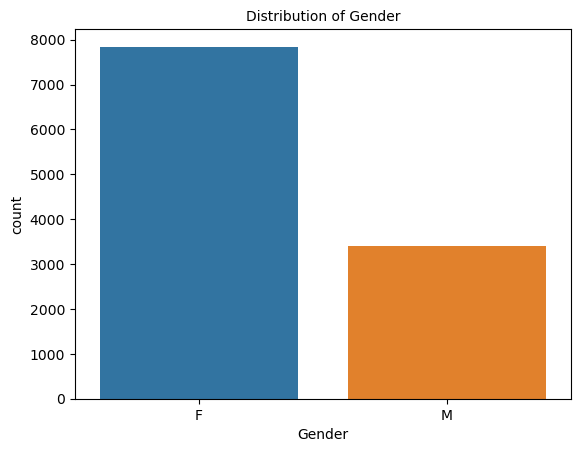

In [14]:
sns.countplot(data=df,x='Gender')
plt.title('Distribution of Gender', fontsize=10)

<function matplotlib.pyplot.show(close=None, block=None)>

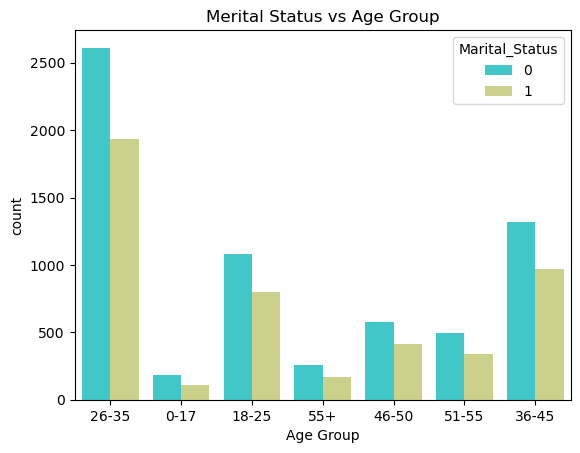

In [15]:
sns.countplot(data=df,x='Age Group',hue='Marital_Status',palette='rainbow')
plt.title('Merital Status vs Age Group')
plt.show

**from above graph ,most of the buyers are  married females in 26-35 age group.**

<function matplotlib.pyplot.show(close=None, block=None)>

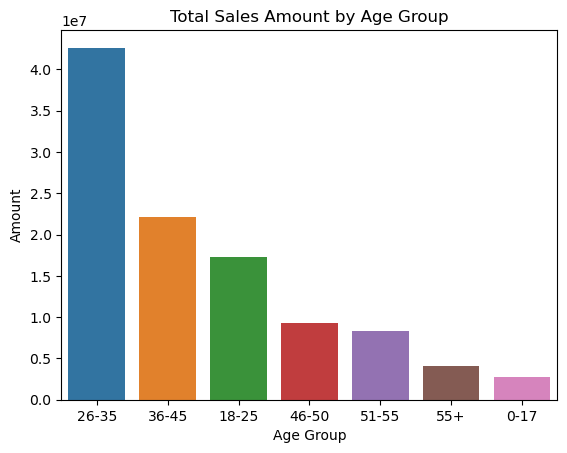

In [16]:
sales_age = df.groupby(['Age Group'], as_index=False)['Amount'].sum().sort_values(by='Amount', ascending=False)
sns.barplot(x = 'Age Group',y= 'Amount' ,data = sales_age)
plt.title('Total Sales Amount by Age Group')
plt.show

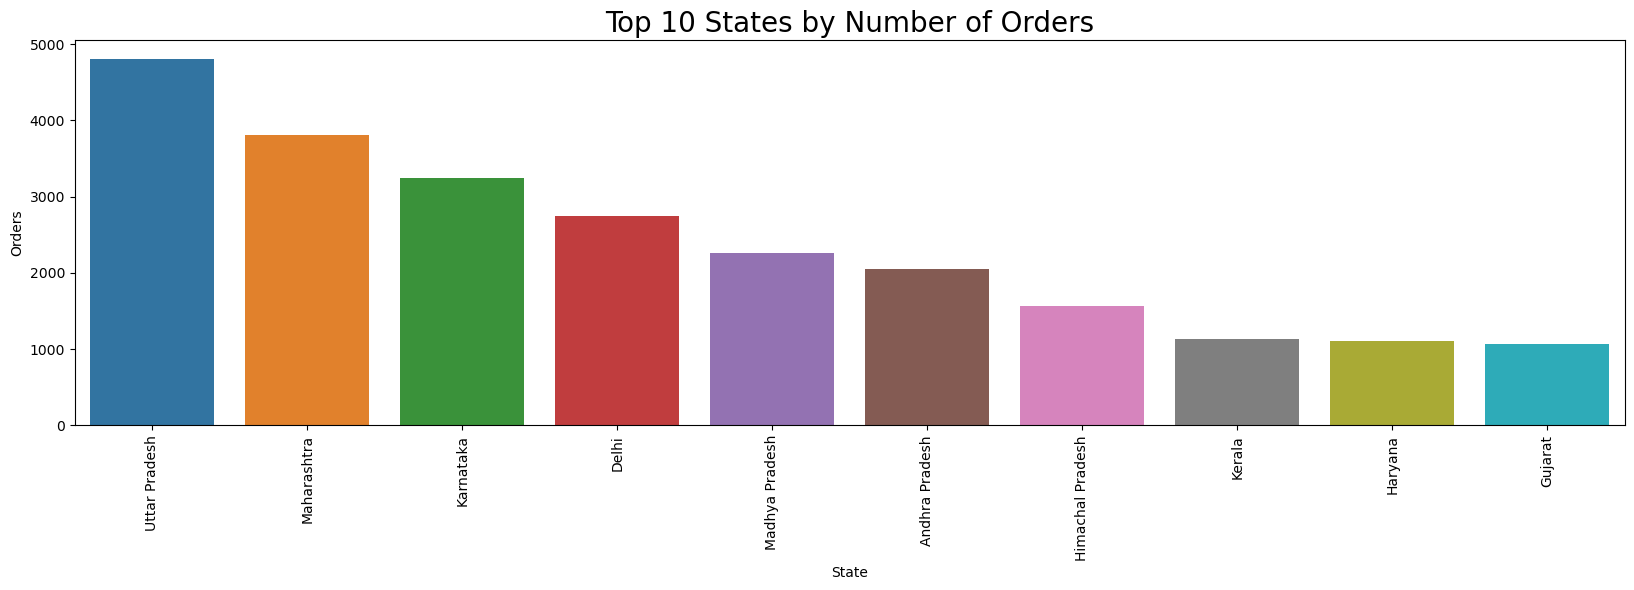

In [17]:
orders_in_states = df.groupby(['State'], as_index=False)['Orders'].sum().sort_values(by='Orders', ascending=False).head(10)
plt.figure(figsize=(20,5))
plt.xticks(rotation='vertical')

sns.barplot(x='State',y='Orders',data=orders_in_states)
plt.title('Top 10 States by Number of Orders',fontsize=20)
plt.show()

**most of the buyers are from Uttar Pradesh, Maharashtra and Karnataka.**

<Axes: xlabel='Gender', ylabel='Orders'>

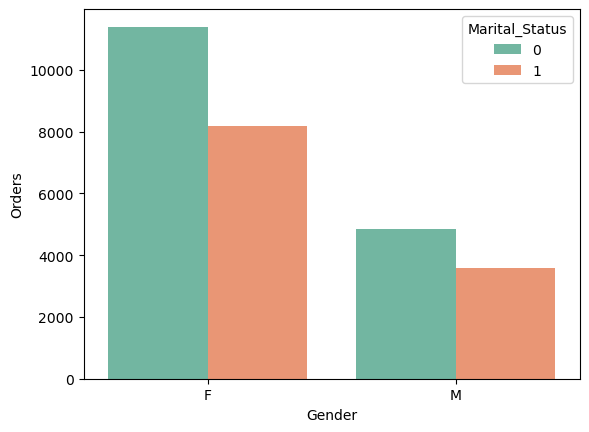

In [18]:
order_gender = df.groupby(['Gender','Marital_Status'], as_index=False)['Orders'].sum().sort_values(by='Orders', ascending=False)
sns.barplot(data=order_gender,x='Gender',y='Orders',hue='Marital_Status',palette='Set2')

Text(0.5, 1.0, 'Number of Orders by Zone')

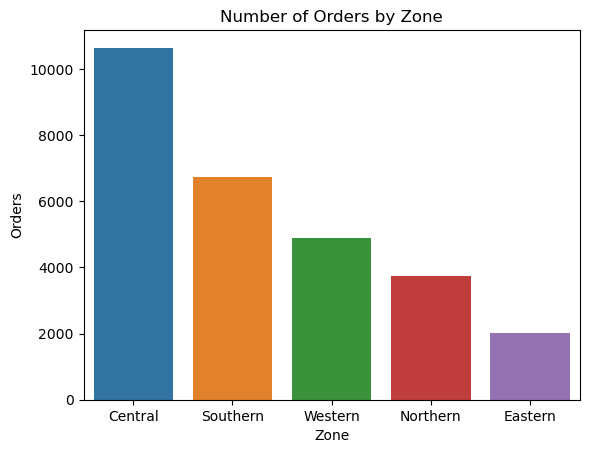

In [19]:
order_in_zone = df.groupby(['Zone'], as_index=False)['Orders'].sum().sort_values(by='Orders', ascending=False)
sns.barplot(data=order_in_zone,x='Zone',y='Orders')
plt.title('Number of Orders by Zone')

<Figure size 1400x1900 with 0 Axes>

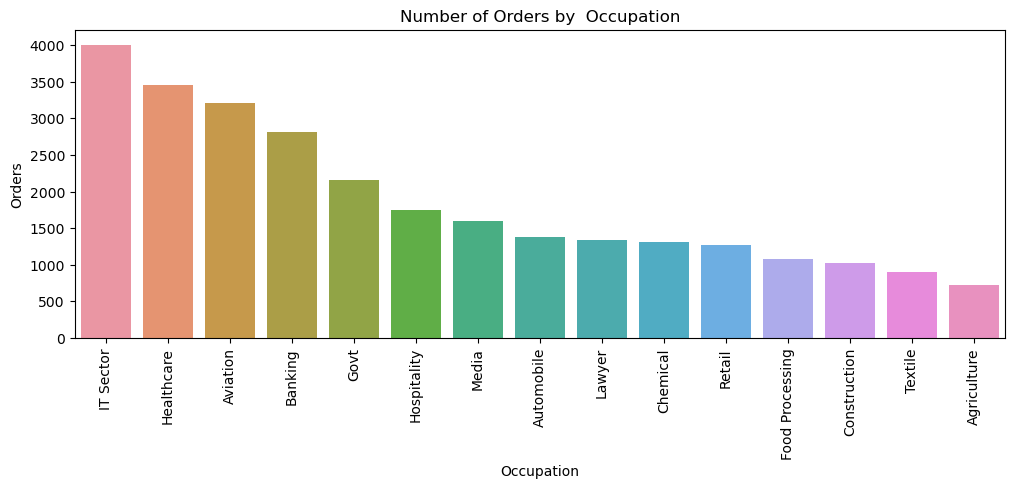

<Figure size 1400x1900 with 0 Axes>

In [20]:
sales_occupation = df.groupby(['Occupation'], as_index=False)['Orders'].sum().sort_values(by='Orders', ascending=False)
plt.figure(figsize=(12,4))
sns.barplot(data=sales_occupation,x='Occupation',y='Orders')
plt.title('Number of Orders by  Occupation')
plt.xticks(rotation='vertical')
plt.figure(figsize=(14,19))


**most of the buyers are working in IT Sector, Healthcare, Aviation**

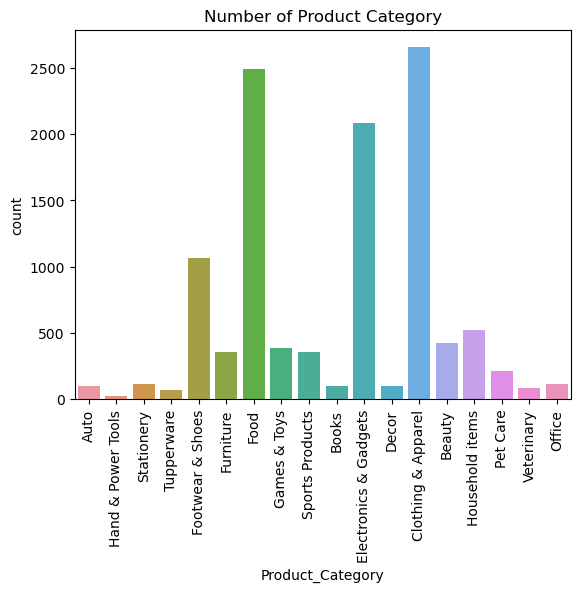

In [21]:
sns.countplot(data=df,x='Product_Category')
plt.title('Number of Product Category')

plt.xticks(rotation='vertical')
plt.show()


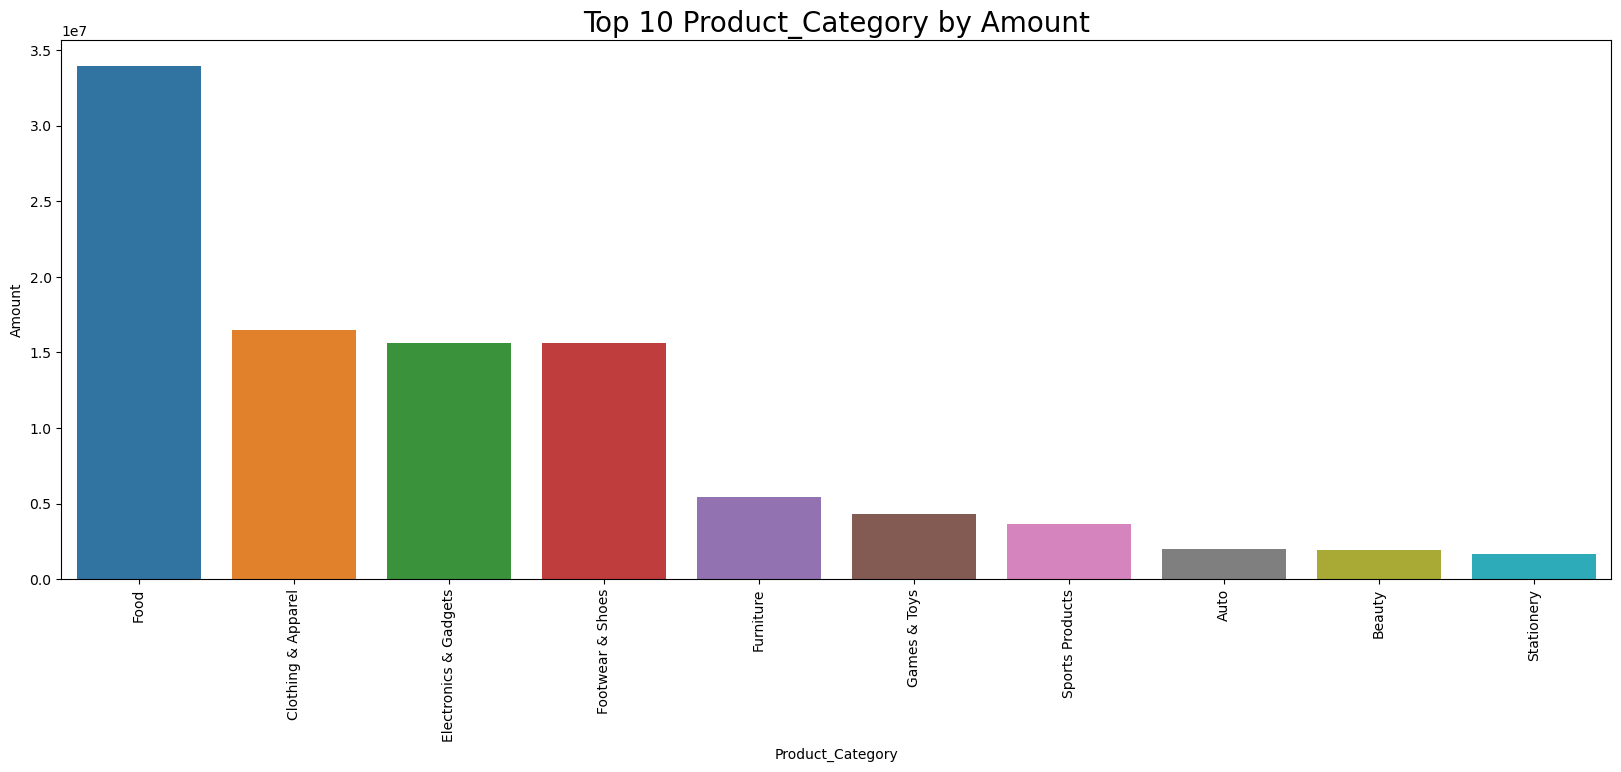

In [22]:
sales_age = df.groupby(['Product_Category'], as_index=False)['Amount'].sum().sort_values(by='Amount', ascending=False).head(10)
plt.figure(figsize=(20,7))
sns.barplot(data=sales_age,x='Product_Category',y='Amount')
plt.title('Top 10 Product_Category by Amount',fontsize=20)
plt.xticks(rotation='vertical')
plt.show()


**most of the sold product are food ,clothing & apparel and electronics and gadgets**

<function matplotlib.pyplot.show(close=None, block=None)>

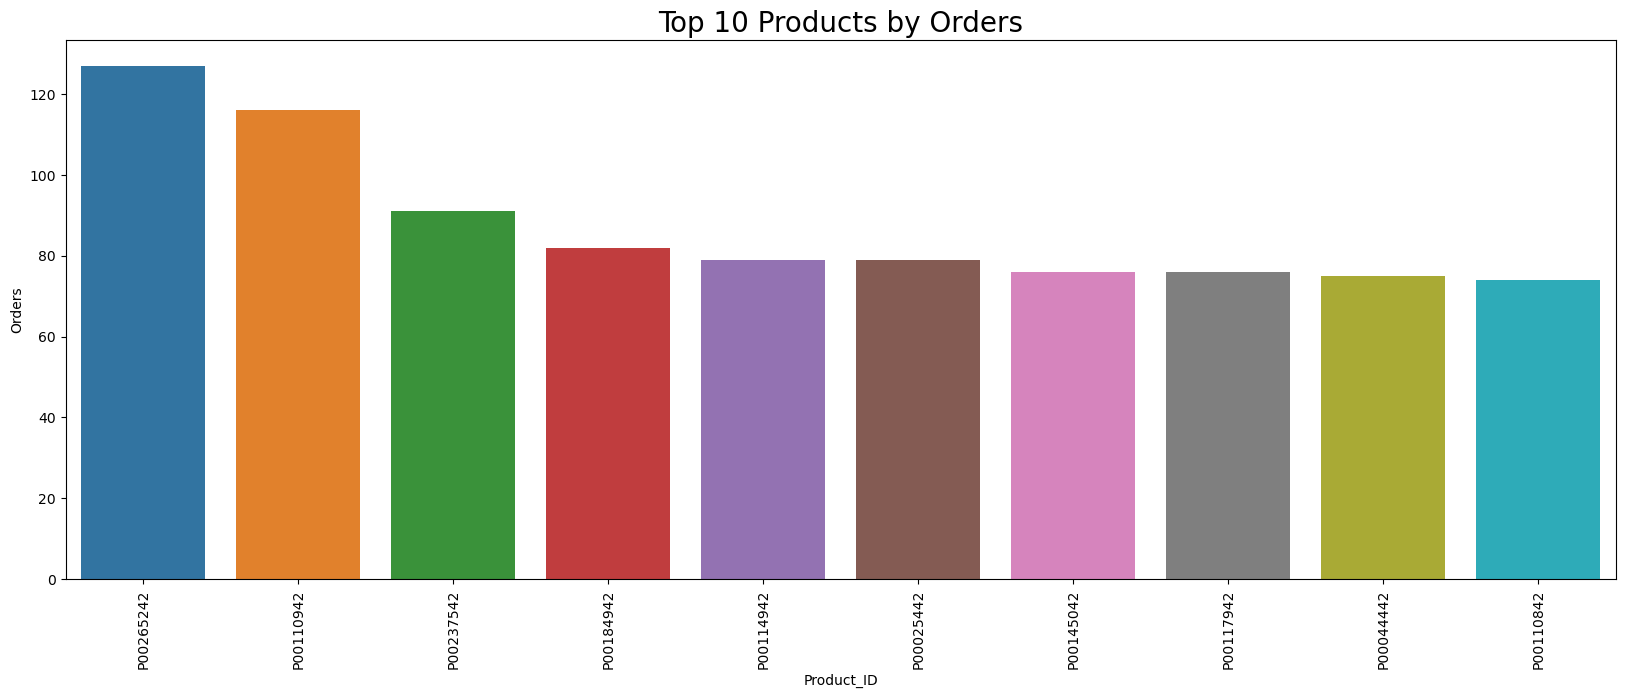

In [23]:
#top 10 sold product
sales_age = df.groupby(['Product_ID'], as_index=False)['Orders'].sum().sort_values(by='Orders', ascending=False).head(10)
plt.figure(figsize=(20,7))
sns.barplot(data=sales_age,x='Product_ID',y='Orders')
plt.title('Top 10 Products by Orders',fontsize=20)
plt.xticks(rotation='vertical')
plt.show


**married women in 26-35 age group mostly from Uttar Pradesh, Maharashtra and Karnataka who works in IT Sector, Healthcare, Aviation buy most of food ,clothing & apparel and electronics & gadgetsthe products.** 